<a href="https://colab.research.google.com/github/harishahamed26/Sentimental-Analysis/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS OF THE TWITTER DATASET 


In [1]:
# Importing of necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import nltk

nltk.download('wordnet')  # required for WordNetLemmatizer
nltk.download('omw-1.4')  # required for WordNetLemmatizer
nltk.download('punkt')    # required for Tokenizers

from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer       #Stemmer 
from nltk.stem import WordNetLemmatizer   #Lemmatization


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df_sentimentalDS = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Sentimental-Analysis/main/data/train.csv')
df_sentimentalDS.head(5)

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


# DATA CLEANING & EDA


In [3]:
df_sentimentalDS = df_sentimentalDS.drop('id', axis = 1)

In [4]:
df_sentimentalDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       16363 non-null  object
 1   sentiment  16363 non-null  object
dtypes: object(2)
memory usage: 255.8+ KB


In [5]:
df_sentimentalDS.isna().sum()

text         0
sentiment    0
dtype: int64

In [6]:
df_sentimentalDS.describe()

,text,sentiment
count,16363,16363
unique,16363,2
top,Sooo SAD I will miss you here in San Diego!!!,positive
freq,1,8582


In [7]:
# Importing Preprocessing from sklearn to perform the label encoding operation

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_sentimentalDS['sentiment']= label_encoder.fit_transform(df_sentimentalDS['sentiment'])
df_sentimentalDS



,text,sentiment
0,Sooo SAD I will miss you here in San Diego!!!,0
1,my boss is bullying me...,0
2,what interview! leave me alone,0
3,"Sons of ****, why couldn`t they put them on t...",0
4,2am feedings for the baby are fun when he is a...,1
...,...,...
16358,enjoy ur night,1
16359,wish we could come see u on Denver husband l...,0
16360,I`ve wondered about rake to. The client has ...,0
16361,Yay good for both of you. Enjoy the break - y...,1


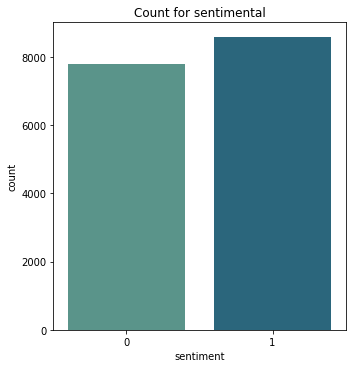

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(5,5))
sns.countplot(df_sentimentalDS['sentiment'], palette = 'crest')
plt.tight_layout()
plt.title('Count for sentimental')
plt.show()

In [9]:
# Converting all the strings to lower case 

df_sentimentalDS['text'] = df_sentimentalDS['text'].str.lower()

In [10]:
# Removing punctuation, special charaters and URL

df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'[^\w\s]+', '') # Removing punctuations
df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'http\S+', '')  # Removing URL
df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'[^\w\s]', '')      # Removing Special Charaters
df_sentimentalDS['text']


0               sooo sad i will miss you here in san diego
1                                   my boss is bullying me
2                            what interview leave me alone
3         sons of  why couldnt they put them on the rel...
4        2am feedings for the baby are fun when he is a...
                               ...                        
16358                                       enjoy ur night
16359     wish we could come see u on denver  husband l...
16360     ive wondered about rake to  the client has ma...
16361     yay good for both of you enjoy the break  you...
16362                                but it was worth it  
Name: text, Length: 16363, dtype: object

# DATA PRE-PROCESSING

1. TOKENISATION 
    *   TOKENISATION -  SINCE THE DATASET IS BASED ON THE TWEET. 
        TWEET TOKENISATION IS USED.

2. NORMALISATION
    *   STEMMING
    *   LEMMATIZATION





In [11]:
# TOKENISATION

tweet = TweetTokenizer()

Token_words = [tweet.tokenize(text) for text in df_sentimentalDS['text']]
print(' Generated Token Words:')
print(Token_words[:2])


Token_Sentence = [' '.join(token) for token in Token_words ]
print('\n Generated Token Sentence:')

df_sentimentalDS['Tokenised_text'] = Token_Sentence
df_sentimentalDS.head(2)



 Generated Token Words:
[['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'], ['my', 'boss', 'is', 'bullying', 'me']]

 Generated Token Sentence:


,text,sentiment,Tokenised_text
0,sooo sad i will miss you here in san diego,0,sooo sad i will miss you here in san diego
1,my boss is bullying me,0,my boss is bullying me


In [12]:
# Stemming 

Stem = PorterStemmer()

Stemming = []
for token in Token_words:
  Stem_Token = [Stem.stem(word) for word in token ] 
  Join_Stem_Token = ' '.join(Stem_Token)
  Stemming.append(Join_Stem_Token)

df_sentimentalDS['Stem_Text'] = Stemming
df_sentimentalDS.head(2)

,text,sentiment,Tokenised_text,Stem_Text
0,sooo sad i will miss you here in san diego,0,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,0,my boss is bullying me,my boss is bulli me


In [13]:
# Lemmatization

WordLemma = WordNetLemmatizer()
Lemma_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in Token_words:
  Lemma_Words = [WordLemma.lemmatize(word) for word in tokens]
  Join_Lemma_Words = ' '.join(Lemma_Words)
  Lemma_sentences.append(Join_Lemma_Words)

df_sentimentalDS['Lemma_text'] = Lemma_sentences
df_sentimentalDS.head(2)

,text,sentiment,Tokenised_text,Stem_Text,Lemma_text
0,sooo sad i will miss you here in san diego,0,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,0,my boss is bullying me,my boss is bulli me,my bos is bullying me


In [14]:
df_sentimentalDS.head(4)

,text,sentiment,Tokenised_text,Stem_Text,Lemma_text
0,sooo sad i will miss you here in san diego,0,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,0,my boss is bullying me,my boss is bulli me,my bos is bullying me
2,what interview leave me alone,0,what interview leave me alone,what interview leav me alon,what interview leave me alone
3,sons of why couldnt they put them on the rel...,0,sons of why couldnt they put them on the relea...,son of whi couldnt they put them on the releas...,son of why couldnt they put them on the releas...


# Model Generation using the Count Vectorization method and SVM algorithm



Models:
  1.  Raw Text
  2.  Tokenised Text
  3.  Stemming Text
  4.  Lemmatization Text

To Find accuracy algorithm used:
  *   Support Vector Machine (SVM)




In [15]:
# Defination of SVM Algorithm with plotting the graph.

def Perform_SVM(X_train_text,X_val_text, Y_train, Y_test):
  
# convert train and test text data to numeric vectors
  X_train = vectorizer.transform(X_train_text)
  X_test = vectorizer.transform(X_val_text)


  clf = svm.SVC(kernel='linear', random_state=100) 
  clf.fit(X_train, Y_train)

  # Make predictions on test data
  Y_pred = clf.predict(X_test)
  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
  print(f'Accuracy: {accuracy * 100}')

  print(f'confusion_matrix: \n')
  print(confusion_matrix)
  print('\n')

  plt.title(' Confusion Matrix')
  sns.heatmap(confusion_matrix , annot = True)
  plt.show()
  return accuracy * 100 , clf


## Model One

Accuracy: 85.59788144224893
confusion_matrix: 

[[2030  368]
 [ 339 2172]]




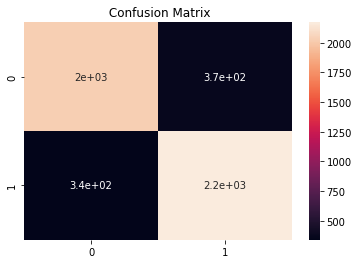

In [16]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

CV_M1_Accuracy, CV_M1 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Two


Accuracy: 85.86270116113262
confusion_matrix: 

[[2034  364]
 [ 330 2181]]




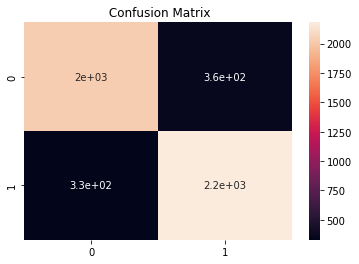

In [17]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Tokenised_text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

CV_M2_Accuracy, CV_M2 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Three

Accuracy: 85.92381340395193
confusion_matrix: 

[[2041  357]
 [ 334 2177]]




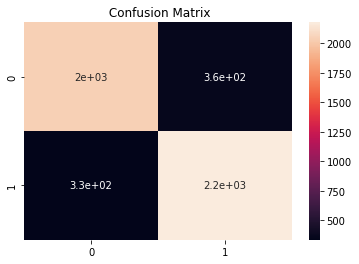

In [18]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Stem_Text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

CV_M3_Accuracy, CV_M3 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Four

Accuracy: 86.06640863719699
confusion_matrix: 

[[2061  337]
 [ 347 2164]]




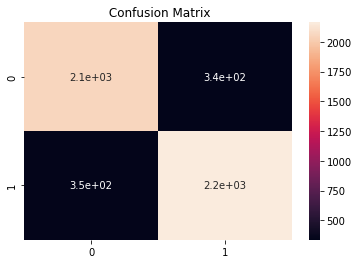

In [19]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Lemma_text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

CV_M4_Accuracy, CV_M4 = Perform_SVM(x_train, x_test, y_train, y_test )


In [20]:
# Accuracy for all the 4 models 
print('Model Accuracy using the Count vectorization Method and SVM Algoritm')
print(f'Model 1 Accuracy {CV_M1_Accuracy:.3f} ')
print(f'Model 2 Accuracy {CV_M2_Accuracy:.3f} ')
print(f'Model 3 Accuracy {CV_M3_Accuracy:.3f} ')
print(f'Model 4 Accuracy {CV_M4_Accuracy:.3f} ')


Model Accuracy using the Count vectorization Method and SVM Algoritm
Model 1 Accuracy 85.598 
Model 2 Accuracy 85.863 
Model 3 Accuracy 85.924 
Model 4 Accuracy 86.066 


# Model Generation using the TF-IDF method and SVM algorithm

## Model One

Accuracy: 86.71827256060297
confusion_matrix: 

[[2095  303]
 [ 349 2162]]




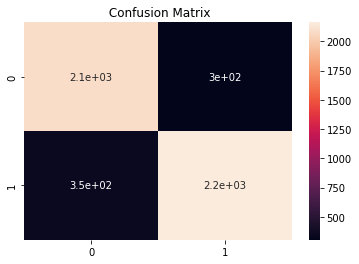

In [21]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = TfidfVectorizer()   # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

TF_IDF_M1_Accuracy, TF_IDF_M1 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Two

Accuracy: 86.69790181299653
confusion_matrix: 

[[2094  304]
 [ 349 2162]]




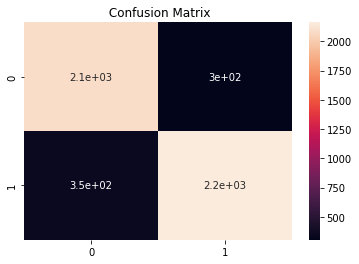

In [22]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Tokenised_text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

TF_IDF_M2_Accuracy, TF_IDF_M2 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Three


In [23]:
df_sentimentalDS.columns


Index(['text', 'sentiment', 'Tokenised_text', 'Stem_Text', 'Lemma_text'], dtype='object')

Accuracy: 87.18679975555102
confusion_matrix: 

[[2117  281]
 [ 348 2163]]




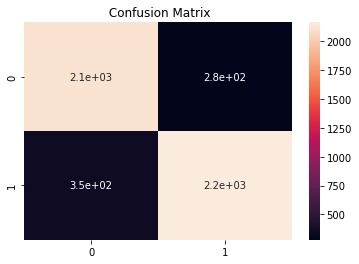

In [24]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Stem_Text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

TF_IDF_M3_Accuracy, TF_IDF_M3 = Perform_SVM(x_train, x_test, y_train, y_test )


## Model Four

Accuracy: 86.43308209411286
confusion_matrix: 

[[2104  294]
 [ 372 2139]]




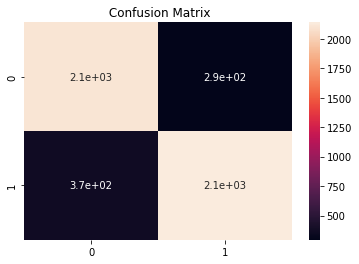

In [25]:
# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Lemma_text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
vectorizer.fit(x_test)

TF_IDF_M4_Accuracy, TF_IDF_M4 = Perform_SVM(x_train, x_test, y_train, y_test )


In [26]:
# Accuracy for all the 4 models 
print('Model Accuracy using the Count vectorization Method and SVM Algoritm')
print(f'Model 1 Accuracy {TF_IDF_M1_Accuracy:.3f} ')
print(f'Model 2 Accuracy {TF_IDF_M2_Accuracy:.3f} ')
print(f'Model 3 Accuracy {TF_IDF_M3_Accuracy:.3f} ')
print(f'Model 4 Accuracy {TF_IDF_M4_Accuracy:.3f} ')


Model Accuracy using the Count vectorization Method and SVM Algoritm
Model 1 Accuracy 86.718 
Model 2 Accuracy 86.698 
Model 3 Accuracy 87.187 
Model 4 Accuracy 86.433 


# Comparing the Accuracy of Count Vectorization and TF-IDF Vectorizaiton


Table formate of Accuracy for Count Vectorization and TF-IDF Vectorizaiton

In [27]:
print('\t COUNT VECTORIZATION | TF-IDF VECTORIZATION')
print(f" MODEL 1 | {CV_M1_Accuracy} | {TF_IDF_M1_Accuracy}")
print(f" MODEL 2 | {CV_M2_Accuracy} | {TF_IDF_M2_Accuracy}")
print(f" MODEL 3 | {CV_M3_Accuracy} | {TF_IDF_M3_Accuracy}")
print(f" MODEL 4 | {CV_M4_Accuracy} | {TF_IDF_M4_Accuracy}")

	 COUNT VECTORIZATION | TF-IDF VECTORIZATION
 MODEL 1 | 85.59788144224893 | 86.71827256060297
 MODEL 2 | 85.86270116113262 | 86.69790181299653
 MODEL 3 | 85.92381340395193 | 87.18679975555102
 MODEL 4 | 86.06640863719699 | 86.43308209411286


Finding the Best model based on the Accuracy 


In [28]:
OverAllmodelAccuracy = {
    'CV_M1'     : CV_M1_Accuracy,
    'CV_M2'     : CV_M2_Accuracy,
    'CV_M3'     : CV_M3_Accuracy,
    'CV_M4'     : CV_M4_Accuracy,
    'TF_IDF_M1' : TF_IDF_M1_Accuracy,
    'TF_IDF_M2' : TF_IDF_M2_Accuracy,
    'TF_IDF_M3' : TF_IDF_M3_Accuracy,
    'TF_IDF_M4' : TF_IDF_M4_Accuracy,
}

BestModel = max(OverAllmodelAccuracy, key= lambda x: OverAllmodelAccuracy[x])
print(f'The best model based on the accuracy is {BestModel}')

The best model based on the accuracy is TF_IDF_M3


# Prediction of Test Dataset

In [29]:
df_Prediction = pd.DataFrame()
df_Prediction1 = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Sentimental-Analysis/main/data/test.csv')
df_Prediction1.drop('id', axis=1 , inplace = True)
df_Prediction['text'] = df_Prediction1['text']
df_Prediction['text'] = df_Prediction['text'].str.lower()

df_Prediction['text'] = df_Prediction['text'].str.replace(r'[^\w\s]+', '') # Removing punctuations
df_Prediction['text'] = df_Prediction['text'].str.replace(r'http\S+', '')  # Removing URL
df_Prediction['text'] = df_Prediction['text'].str.replace(r'[^\w\s]', '')


In [38]:
df_PredictCV = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Sentimental-Analysis/main/data/test.csv')
df_PredictCV = df_PredictCV.drop(['text'] , axis = True)
df_PredictTF_IDF = df_PredictCV.copy()


Accuracy: 86.0256671419841
confusion_matrix: 

[[2053  345]
 [ 341 2170]]




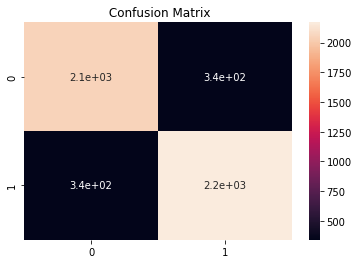

In [53]:
# Count VECTORIZATION 

tweet = TweetTokenizer()
Token_words = [tweet.tokenize(text) for text in df_Prediction['text']]
Token_Sentence = [' '.join(token) for token in Token_words ]


WordLemma = WordNetLemmatizer()
Lemma_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in Token_words:
  Lemma_Words = [WordLemma.lemmatize(word) for word in tokens]
  Join_Lemma_Words = ' '.join(Lemma_Words)
  Lemma_sentences.append(Join_Lemma_Words)

# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Lemma_text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
#vectorizer.fit(x_test)

CV_M3_Accuracy, CV_M3 = Perform_SVM(x_train, x_test, y_train, y_test )


X_test = vectorizer.transform(Lemma_sentences)
df_PredictCV['prediction'] = CV_M3.predict(X_test)



     

In [58]:
# replacing 1 as positive and 0 as negative

df_PredictCV['prediction'] = df_PredictCV['prediction'].astype(str)
df_PredictCV['prediction'] = df_PredictCV['prediction'].replace('1','positive')
df_PredictCV['prediction'] = df_PredictCV['prediction'].replace('0','negative')

In [61]:
df_PredictCV.to_csv('/content/CV-predictions.csv', index=False)

Accuracy: 87.5534732124669
confusion_matrix: 

[[2107  291]
 [ 320 2191]]




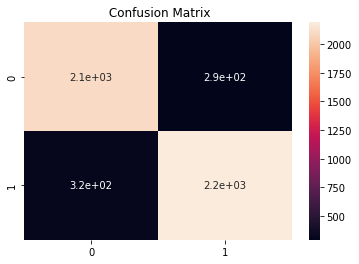

In [62]:
# TF-IDF VECTORIZATION 


tweet = TweetTokenizer()
Token_words = [tweet.tokenize(text) for text in df_Prediction['text']]
Token_Sentence = [' '.join(token) for token in Token_words ]

Stem = PorterStemmer()
Stemming = []
for token in Token_words:
  Stem_Token = [Stem.stem(word) for word in token ] 
  Join_Stem_Token = ' '.join(Stem_Token)
  Stemming.append(Join_Stem_Token)

# Train Test Split for the model 1 [Raw Text]

x_train, x_test, y_train, y_test = train_test_split(df_sentimentalDS['Stem_Text'] ,  df_sentimentalDS['sentiment'],
                                   test_size=0.3, random_state = 100 )



vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(x_train)
#vectorizer.fit(x_test)

TF_IDF_M3_Accuracy, TF_IDF_M3 = Perform_SVM(x_train, x_test, y_train, y_test )


X_test = vectorizer.transform(Stemming)
df_PredictTF_IDF['prediction'] = TF_IDF_M3.predict(X_test)

     

In [63]:
# replacing 1 as positive and 0 as negative

df_PredictTF_IDF['prediction'] = df_PredictTF_IDF['prediction'].astype(str)
df_PredictTF_IDF['prediction'] = df_PredictTF_IDF['prediction'].replace('1','positive')
df_PredictTF_IDF['prediction'] = df_PredictTF_IDF['prediction'].replace('0','negative')

In [64]:
df_PredictTF_IDF.to_csv('/content/TF-IDF-predictions.csv', index=False)

In [67]:
# Converting into json format for submission

import json

import pandas as pd

# Converting Count Vectorization predicition file
data = []
for index, row in df_PredictCV.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


# Converting TF IDF vectorization predicition file
data1 = []
for index, row in df_PredictTF_IDF.iterrows():
    data1.append({'id': row['id'], 'prediction': row['prediction']})

submission_file_path = "submission1.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data1))



[{'id': '96d74cb729', 'prediction': 'positive'}, {'id': 'eee518ae67', 'prediction': 'negative'}, {'id': '01082688c6', 'prediction': 'positive'}, {'id': '33987a8ee5', 'prediction': 'positive'}, {'id': '726e501993', 'prediction': 'positive'}]
